In [5]:
import mysql.connector
from mysql.connector import Error
import pandas as pd

def fetch_data_from_mysql(table_name):
    try:
        connection = mysql.connector.connect(
            host='5gears.iptime.org',
            user='root',
            password='andong1234',
            database='analysis'
        )

        if connection.is_connected():
            print("MySQL에 성공적으로 연결되었습니다.")
            cursor = connection.cursor()
            sql_query = f"SELECT * FROM {table_name};"
            cursor.execute(sql_query)
            records = cursor.fetchall()
            columns = [i[0] for i in cursor.description]
            df = pd.DataFrame(records, columns=columns)
            print(f"테이블 '{table_name}'에서 {cursor.rowcount}개의 행을 가져왔습니다.")
            return df

    except Error as e:
        print(f"MySQL에서 데이터를 가져오는 중 오류가 발생했습니다: {e}")
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL 연결이 닫혔습니다.")

ods_exchange = fetch_data_from_mysql("ods_exchange")
ods_one = fetch_data_from_mysql("ods_one")
ods_ram = fetch_data_from_mysql("ods_ram")
ods_stock = fetch_data_from_mysql("ods_stock")

MySQL에 성공적으로 연결되었습니다.
테이블 'ods_exchange'에서 26개의 행을 가져왔습니다.
MySQL 연결이 닫혔습니다.
MySQL에 성공적으로 연결되었습니다.
테이블 'ods_one'에서 977개의 행을 가져왔습니다.
MySQL 연결이 닫혔습니다.
MySQL에 성공적으로 연결되었습니다.
테이블 'ods_ram'에서 161개의 행을 가져왔습니다.
MySQL 연결이 닫혔습니다.
MySQL에 성공적으로 연결되었습니다.
테이블 'ods_stock'에서 29088개의 행을 가져왔습니다.
MySQL 연결이 닫혔습니다.


# 원재료

In [33]:
ods_one

,one_id,one_name,one_price,one_date
0,647,철,117.05,2023-01-02
1,757,유연탄,151.00,2023-01-02
2,866,규소,2640.00,2023-01-02
3,977,크롬,2.85,2023-01-02
4,536,알루미늄,2337.50,2023-01-03
...,...,...,...,...
972,758,규소,1545.00,2025-02-10
973,867,크롬,1.53,2025-02-10
974,3,알루미늄,2647.00,2025-02-11
975,2,알루미늄,2628.50,2025-02-12


In [34]:
ods_one['one_date'] = pd.to_datetime(ods_one['one_date'])
ods_one['date'] = ods_one['one_date'].dt.to_period('M')

ods_one = ods_one.groupby(['one_name', 'date'])['one_price'].mean().reset_index()
ods_one.rename(columns={'one_price': 'avg_price'}, inplace=True)

In [35]:
one_df = ods_one.pivot(index='date', columns='one_name', values='avg_price')

In [36]:
one_df = one_df.drop(columns='규소')

In [37]:
one_df

one_name,알루미늄,유연탄,철,크롬
date,,,,
2023-01,2489.02381,144.122,122.364,2.85
2023-02,2417.275,134.005,125.56,2.775
2023-03,2290.108696,120.925,126.4525,2.95
2023-04,2341.0,119.035,113.8925,2.95
2023-05,2267.6,110.922,104.396,2.95
2023-06,2181.068182,91.925,112.7275,2.725
2023-07,2152.380952,89.004,111.768,2.558
2023-08,2134.159091,87.76,109.74,2.2975
2023-09,2177.5,89.675,120.7375,2.175


# 환율

In [38]:
ods_exchange

,exchange_id,exchange_date,exchange_price
0,1,2023-01-01,1233.30
1,2,2023-02-01,1323.02
2,3,2023-03-01,1306.11
3,4,2023-04-01,1337.78
4,5,2023-05-01,1320.56
5,6,2023-06-01,1315.11
6,7,2023-07-01,1277.86
7,8,2023-08-01,1325.14
8,9,2023-09-01,1352.31
9,10,2023-10-01,1352.15


In [39]:
ods_exchange['exchange_date'] = pd.to_datetime(ods_exchange['exchange_date'])
ods_exchange['date'] = ods_exchange['exchange_date'].dt.to_period('M')

In [40]:
exchange_df = ods_exchange[['date', 'exchange_price']]

In [41]:
exchange_df

,date,exchange_price
0,2023-01,1233.30
1,2023-02,1323.02
2,2023-03,1306.11
3,2023-04,1337.78
4,2023-05,1320.56
5,2023-06,1315.11
6,2023-07,1277.86
7,2023-08,1325.14
8,2023-09,1352.31
9,2023-10,1352.15


# 램 

In [42]:
ods_ram

,ram_id,ram_name,ram_price,ram_date
0,1,SKHynix_DDR5-5600_16GB,87750.00,2023-04-01
1,24,Samsung_DDR5-5600_16GB,68090.00,2023-04-01
2,47,ESSENCORE_KLEVV_DDR5-5600_CL46_16GB,78990.00,2023-04-01
3,70,TeamGroup_T-CREATE_DDR5-5600_CL46_Elite_16GB,72380.00,2023-04-01
4,93,Samsung_DDR4-3200_16GB,44879.00,2023-04-01
...,...,...,...,...
156,69,ESSENCORE_KLEVV_DDR5-5600_CL46_16GB,55880.00,2025-02-01
157,92,TeamGroup_T-CREATE_DDR5-5600_CL46_Elite_16GB,53790.00,2025-02-01
158,115,Samsung_DDR4-3200_16GB,39580.00,2025-02-01
159,138,ESSENCORE_KLEVV_DDR4-3200_CL22_16GB,27850.00,2025-02-01


In [43]:
ods_ram['ram_date'] = pd.to_datetime(ods_ram['ram_date'])
ods_ram['date'] = ods_ram['ram_date'].dt.to_period('M')

In [44]:
ram_df = ods_ram.pivot(index='date', columns='ram_name', values='ram_price')
ram_df = ram_df.drop(columns=['ESSENCORE_KLEVV_DDR5-5600_CL46_16GB','TeamGroup_T-CREATE_DDR5-5600_CL46_Elite_16GB','ESSENCORE_KLEVV_DDR4-3200_CL22_16GB', 'Micron_Crucial_DDR4-3200_CL22_16GB'])

In [45]:
ram_df

ram_name,SKHynix_DDR5-5600_16GB,Samsung_DDR4-3200_16GB,Samsung_DDR5-5600_16GB
date,,,
2023-04,87750.00,44879.00,68090.00
2023-05,83360.00,42550.00,49580.00
2023-06,82010.00,37570.00,45150.00
2023-07,80330.00,34540.00,43520.00
2023-08,79850.00,33830.00,43060.00
2023-09,79560.00,36240.00,46100.00
2023-10,78150.00,40400.00,53600.00
2023-11,78500.00,38055.00,50830.00
2023-12,68590.00,40460.00,51890.00


# 주가 

In [46]:
ods_stock

,stock_id,stock_name,stock_code,stock_price,stock_date
0,361,세아베스틸지주,001430,15400.00,2023-01-02
1,878,세아홀딩스,058650,104000.00,2023-01-02
2,1395,동일스틸럭스*,023790,1805.00,2023-01-02
3,1912,아주스틸,139990,9210.00,2023-01-02
4,2429,만호제강,001080,27820.00,2023-01-02
...,...,...,...,...,...
29083,27020,동국산업*,005160,4125.00,2025-02-14
29084,27537,한국선재*,025550,3700.00,2025-02-14
29085,28054,KG스틸,016380,6060.00,2025-02-14
29086,28571,포스코엠텍*,009520,12550.00,2025-02-14


In [48]:
ods_stock['stock_date'] = pd.to_datetime(ods_stock['stock_date'])
ods_stock['date'] = ods_stock['stock_date'].dt.to_period('M')

ods_stock = ods_stock.groupby(['stock_name', 'date'])['stock_price'].mean().reset_index()
ods_stock.rename(columns={'stock_price': 'avg_stock_price'}, inplace=True)

In [50]:
stock_df = ods_stock.groupby('date')['avg_stock_price'].mean().reset_index()
stock_df.columns = ['date', 'avg_stock_price']

In [51]:
stock_df

,date,avg_stock_price
0,2023-01,26050.253704
1,2023-02,27336.501852
2,2023-03,27891.976431
3,2023-04,29984.105556
4,2023-05,29873.590741
5,2023-06,29278.27381
6,2023-07,29490.5
7,2023-08,29998.266348
8,2023-09,29730.370268
9,2023-10,27296.392428


# 병합 

In [54]:
tables = [exchange_df, one_df, stock_df]

from functools import reduce
m_table = reduce(lambda left, right: pd.merge(left, right, on='date', how='inner'), tables)

In [55]:
m_table

,date,exchange_price,알루미늄,유연탄,철,크롬,avg_stock_price
0,2023-01,1233.30,2489.02381,144.122,122.364,2.85,26050.253704
1,2023-02,1323.02,2417.275,134.005,125.56,2.775,27336.501852
2,2023-03,1306.11,2290.108696,120.925,126.4525,2.95,27891.976431
3,2023-04,1337.78,2341.0,119.035,113.8925,2.95,29984.105556
4,2023-05,1320.56,2267.6,110.922,104.396,2.95,29873.590741
5,2023-06,1315.11,2181.068182,91.925,112.7275,2.725,29278.27381
6,2023-07,1277.86,2152.380952,89.004,111.768,2.558,29490.5
7,2023-08,1325.14,2134.159091,87.76,109.74,2.2975,29998.266348
8,2023-09,1352.31,2177.5,89.675,120.7375,2.175,29730.370268
9,2023-10,1352.15,2192.454545,97.12,119.77,2.138,27296.392428


# 자동차 

In [110]:
annual_increase_rate = (4922 - 3620) / (3620 * (2024 - 2019)) * 100 / 100

impact_rates = {
    'exchange_price': annual_increase_rate * 0.5,
    '알루미늄': annual_increase_rate * 0.5,
    '유연탄': annual_increase_rate * 0.1,
    '철': annual_increase_rate * 0.1,
    '크롬': annual_increase_rate * 0.1,
    'avg_stock_price': annual_increase_rate * 0.1
}

initial_car_price = 50000000

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(m_table[['exchange_price', '알루미늄', '유연탄', '철', '크롬', 'avg_stock_price']])

scaled_df = pd.DataFrame(scaled_data, columns=['exchange_price', '알루미늄', '유연탄', '철', '크롬', 'avg_stock_price'])

In [111]:
car_prices = []
for index, row in scaled_df.iterrows():
    price_change = (
        float(row['exchange_price']) * impact_rates['exchange_price'] +
        float(row['알루미늄']) * impact_rates['알루미늄'] +
        float(row['유연탄']) * impact_rates['유연탄'] +
        float(row['철']) * impact_rates['철'] +
        float(row['크롬']) * impact_rates['크롬'] +
        float(row['avg_stock_price']) * impact_rates['avg_stock_price']
    )
    
    new_car_price = initial_car_price + price_change * initial_car_price
    car_prices.append(new_car_price)

# 결과를 DataFrame에 추가
m_table['car_price'] = car_prices

In [112]:
m_table

,date,exchange_price,알루미늄,유연탄,철,크롬,avg_stock_price,car_price
0,2023-01,1233.30,2489.02381,144.122,122.364,2.85,26050.253704,4.949419e+07
1,2023-02,1323.02,2417.275,134.005,125.56,2.775,27336.501852,5.170544e+07
2,2023-03,1306.11,2290.108696,120.925,126.4525,2.95,27891.976431,4.964223e+07
3,2023-04,1337.78,2341.0,119.035,113.8925,2.95,29984.105556,5.108364e+07
4,2023-05,1320.56,2267.6,110.922,104.396,2.95,29873.590741,4.917739e+07
5,2023-06,1315.11,2181.068182,91.925,112.7275,2.725,29278.27381,4.760553e+07
6,2023-07,1277.86,2152.380952,89.004,111.768,2.558,29490.5,4.583406e+07
7,2023-08,1325.14,2134.159091,87.76,109.74,2.2975,29998.266348,4.701504e+07
8,2023-09,1352.31,2177.5,89.675,120.7375,2.175,29730.370268,4.868769e+07
9,2023-10,1352.15,2192.454545,97.12,119.77,2.138,27296.392428,4.866631e+07


# 상관관계 

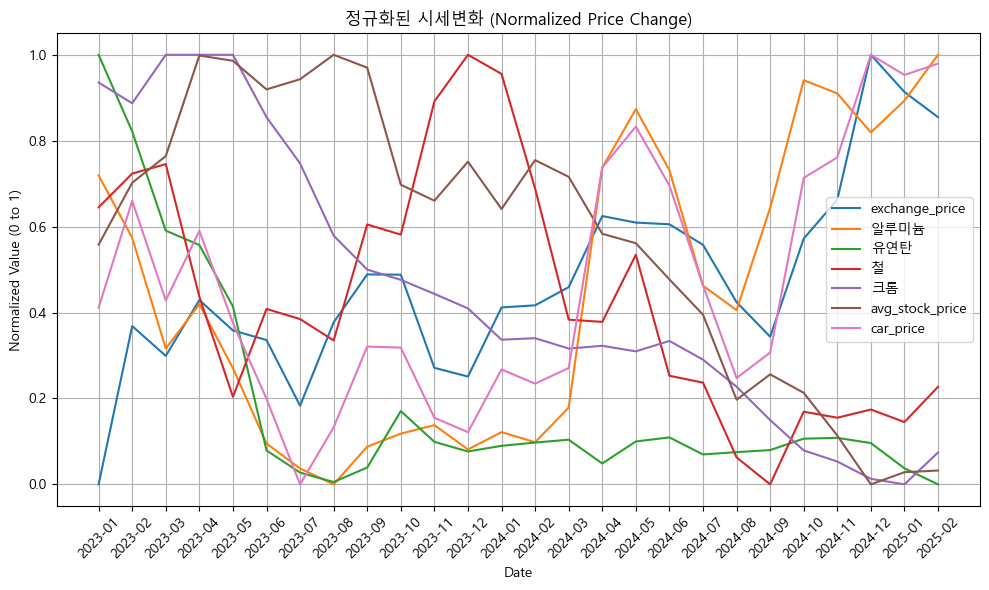

In [113]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

# 정규화
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(m_table.iloc[:, 1:])  # date 제외
scaled_m_table = pd.DataFrame(scaled_values, columns=m_table.columns[1:])
scaled_m_table['date'] = m_table['date'].astype(str)  # date를 문자열로 변환

# 정규화된 데이터 시각화
plt.figure(figsize=(10, 6))
for column in scaled_m_table.columns[:-1]:  # date 제외
    plt.plot(scaled_m_table['date'], scaled_m_table[column], label=column)

plt.title('정규화된 시세변화 (Normalized Price Change)')
plt.xlabel('Date')
plt.ylabel('Normalized Value (0 to 1)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

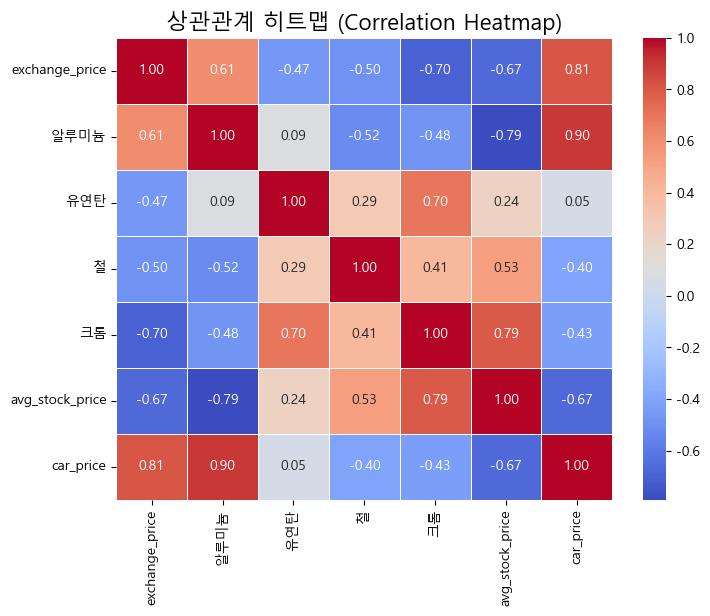

In [116]:
import seaborn as sns

m_table_without_date = m_table.drop(columns=['date'])
correlation_matrix = m_table_without_date.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('상관관계 히트맵 (Correlation Heatmap)', fontsize=16)
plt.show()

# 저장

In [124]:
import mysql.connector
from mysql.connector import Error

# MySQL에 데이터 저장 함수
def save_to_database(df, table_name):
    try:
        connection = mysql.connector.connect(
            host='192.168.0.163',
            user='root',
            password='andong1234',
            database='analysis'
        )

        if connection.is_connected():
            print("MySQL에 성공적으로 연결되었습니다.")

            # 커서 생성 및 테이블 생성 (필요 시)
            cursor = connection.cursor()
            create_table_query = f"""
            CREATE TABLE IF NOT EXISTS {table_name} (
                car_id INT NOT NULL AUTO_INCREMENT,
                car_price BIGINT NOT NULL,
                car_date DATE NOT NULL,
                PRIMARY KEY (car_id)
            );
            """
            cursor.execute(create_table_query)

            # 데이터 삽입
            for _, row in df.iterrows():
                insert_query = f"""
                INSERT INTO {table_name} (car_price, car_date)
                VALUES (%s, %s);
                """
                cursor.execute(insert_query, (row['car_price'], row['date'].strftime('%Y-%m-%d')))  # date를 MySQL 형식으로 변환

            # 커밋 및 종료
            connection.commit()
            print(f"{len(df)}개의 행이 '{table_name}' 테이블에 저장되었습니다.")

    except Error as e:
        print(f"데이터베이스 작업 중 오류가 발생했습니다: {e}")
    finally:
        if connection.is_connected():
            cursor.close()
            connection.close()
            print("MySQL 연결이 닫혔습니다.")

# 필요한 열만 선택하여 DB에 저장
save_to_database(m_table[['date', 'car_price']], table_name='stage_car')


MySQL에 성공적으로 연결되었습니다.
26개의 행이 'stage_car' 테이블에 저장되었습니다.
MySQL 연결이 닫혔습니다.
